In [1]:
import pandas as pd
import numpy as np 

## Read and Cleaning the data

In [2]:
stats=pd.read_csv('Part4 - sports.csv')
stats.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [3]:
stats.isna().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [4]:
stats=stats.dropna(axis=0)
stats.shape

(90, 7)

In [5]:
stats.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

In [6]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [7]:
stats.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


## Bivariate Analysis

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

ipl=stats.copy(deep=True)

<AxesSubplot:title={'center':' Number of Runs '}, xlabel='Runs', ylabel='Name'>

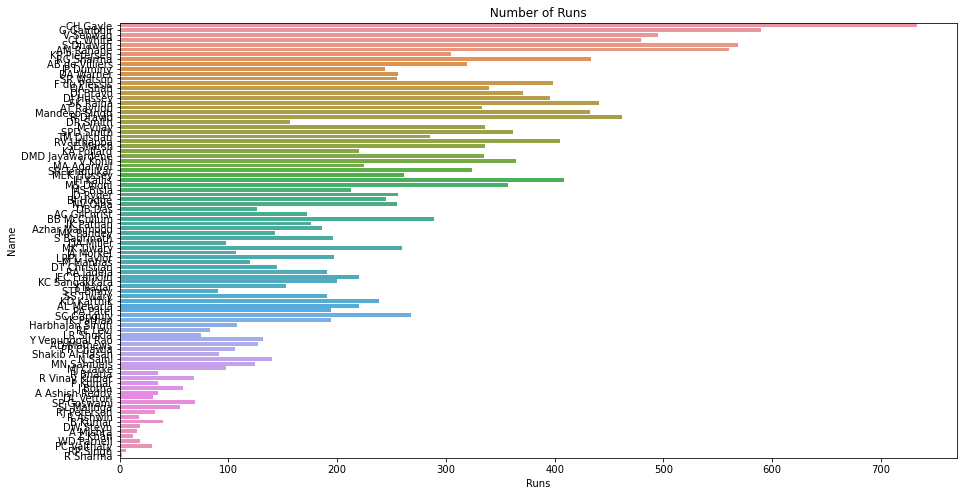

In [9]:
plt.figure(figsize=(15,8))
ipl.sort_values('Runs',ascending=False).head()
plt.title(' Number of Runs ')
sns.barplot( x='Runs' , y= 'Name', data = ipl)

<AxesSubplot:title={'center':'Top 10 Average of Players'}, xlabel='Name', ylabel='Ave'>

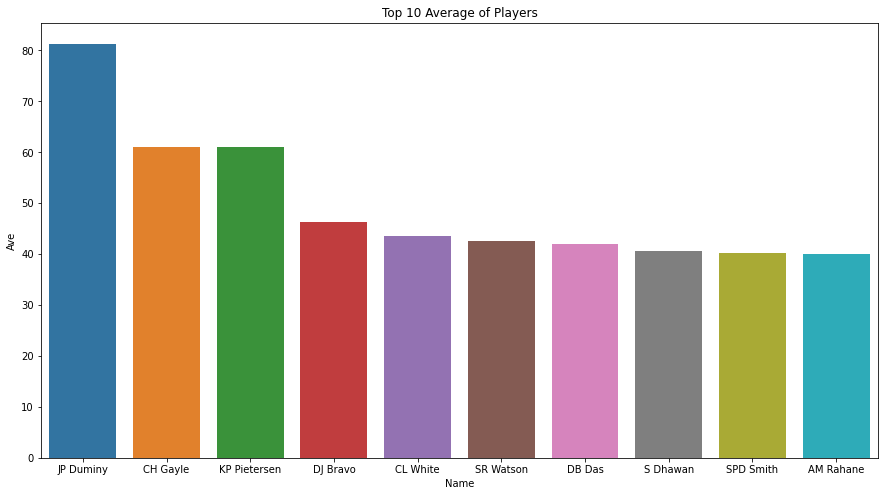

In [10]:
plt.figure(figsize=(15,8))
ipl=stats.sort_values('Ave',ascending=False).head(10)
plt.title('Top 10 Average of Players')
sns.barplot( x='Name' , y= 'Ave', data=ipl)

<AxesSubplot:title={'center':' Top 10 Strike Rate of Batsmen '}, xlabel='Name', ylabel='SR'>

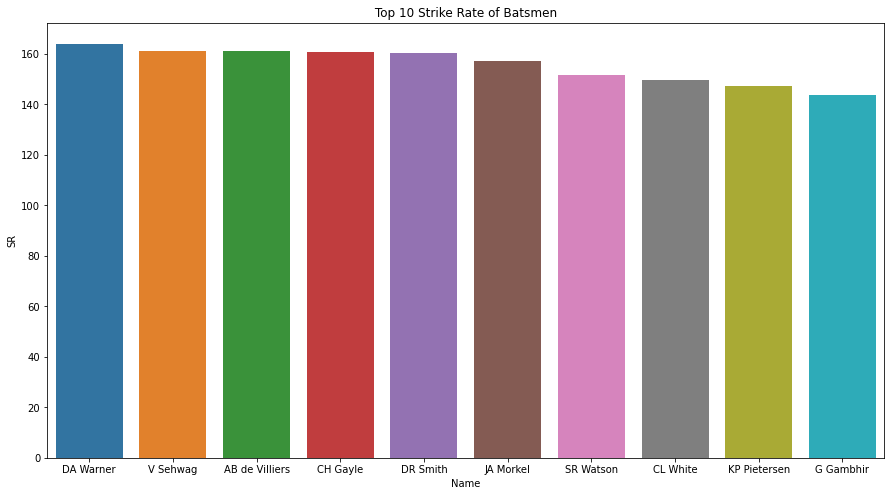

In [11]:
plt.figure(figsize=(15,8))
ipl=stats.sort_values('SR',ascending=False).head(10)
plt.title(' Top 10 Strike Rate of Batsmen ')
sns.barplot(data=ipl, x='Name' , y= 'SR')

<AxesSubplot:title={'center':'Most Number of Sixes '}, xlabel='Name', ylabel='Sixes'>

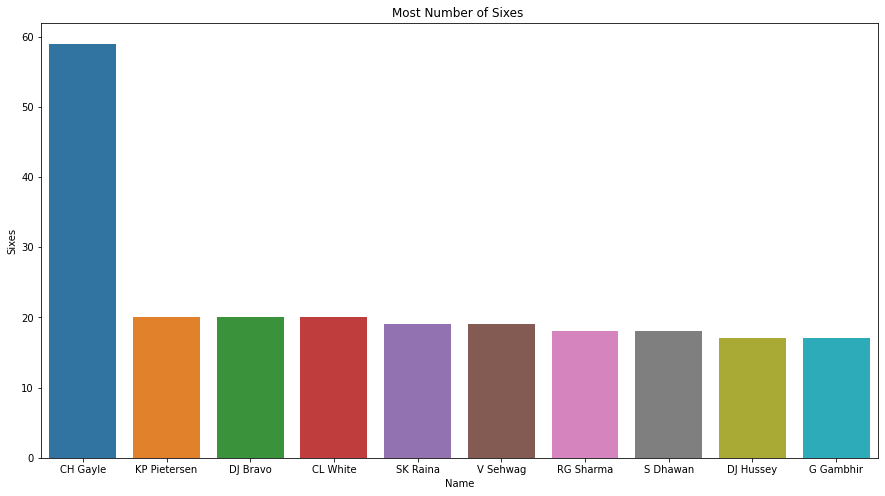

In [12]:
plt.figure(figsize=(15,8))
ipl=stats.sort_values('Sixes',ascending=False).head(10)
plt.title('Most Number of Sixes ')
sns.barplot(data=ipl, x='Name' , y= 'Sixes')

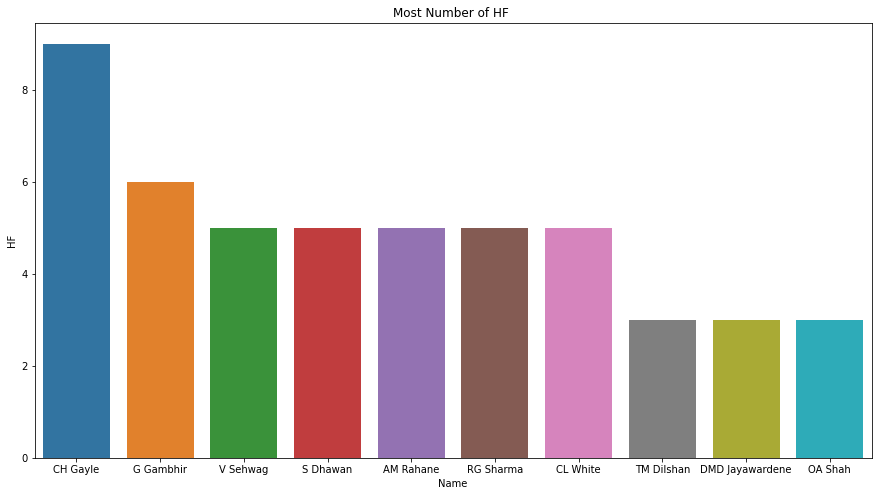

In [13]:
plt.figure(figsize=(15,8))
ipl=stats.sort_values('HF',ascending=False).head(10)
plt.title('Most Number of HF ')
sns.barplot(data=ipl, x='Name' , y= 'HF');

In [14]:
best=stats
best=best.drop(columns=['Name'])
best.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,733.0,61.08,160.74,46.0,59.0,9.0
3,590.0,36.87,143.55,64.0,17.0,6.0
5,495.0,33.00,161.23,57.0,19.0,5.0
7,479.0,43.54,149.68,41.0,20.0,5.0
9,569.0,40.64,129.61,58.0,18.0,5.0


##  Correlation 

In [15]:
corr=best.corr(method='spearman')
corr

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.791919,0.456315,0.952898,0.814127,0.798133
Ave,0.791919,1.000000,0.631531,0.737036,0.779725,0.684022
SR,0.456315,0.631531,1.000000,0.391549,0.713285,0.376038
Fours,0.952898,0.737036,0.391549,1.000000,0.679806,0.812597
Sixes,0.814127,0.779725,0.713285,0.679806,1.000000,0.657885
HF,0.798133,0.684022,0.376038,0.812597,0.657885,1.000000


<AxesSubplot:>

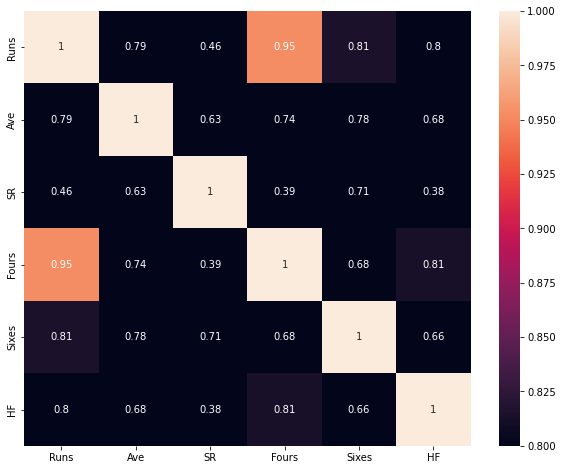

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmin=0.8, linecolor='Red', annot=True)

### Observation
   1. Sixes and fours are Highly co-related with Runs 
   2. Fours is co-related with HF.

### Highly Co-related features

<Figure size 576x432 with 0 Axes>

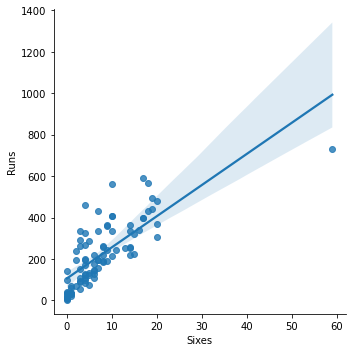

In [17]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Sixes',y='Runs',data=best);

<Figure size 576x432 with 0 Axes>

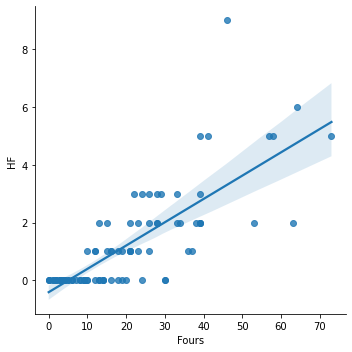

In [18]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Fours',y='HF',data=best);

## k_means Clustering

In [19]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [20]:
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(best)
    wss.append(KM.inertia_)

### Elbow Method
#### To find the best numbers of Clusters

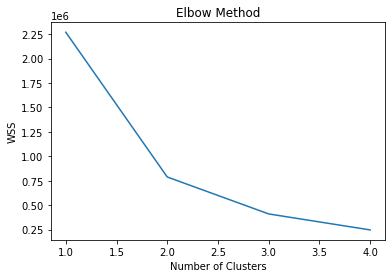

In [21]:
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [22]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2)
k_means.fit(best)
labels=k_means.labels_

In [23]:
stats['Clus']=labels
stats.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Clus
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [24]:
stats['Clus'].value_counts()

0    62
1    28
Name: Clus, dtype: int64

In [25]:
avg=stats.groupby(['Clus']).mean()
avg['Count']=stats.Clus.value_counts().sort_index()
avg

,Runs,Ave,SR,Fours,Sixes,HF,Count
Clus,,,,,,,
0,134.451613,20.091774,114.370323,11.290323,4.645161,0.419355,62
1,409.214286,35.000000,129.778929,38.607143,14.071429,2.892857,28


In [26]:
stats['Clus']=stats['Clus'].replace({1: 'Grade A', 0: 'Grade B'})
stats.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Clus
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade A


In [27]:
stats['Clus'].value_counts().sort_index()

Grade A    28
Grade B    62
Name: Clus, dtype: int64

In [28]:
Grade_A=stats[stats['Clus']=='Grade A']
Grade_A.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Clus
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade A


In [29]:
Grade_B=stats[stats['Clus']=='Grade B']
Grade_B.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Clus
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Grade B
21,DA Warner,256.0,36.57,164.10,28.0,14.0,3.0,Grade B
23,SR Watson,255.0,42.50,151.78,26.0,14.0,2.0,Grade B
41,DR Smith,157.0,39.25,160.20,18.0,7.0,1.0,Grade B
53,KA Pollard,220.0,24.44,138.36,15.0,14.0,2.0,Grade B


## Summary
 
  1. By the KNN method we have divided this into two cluster .
     Grade-A
     Grade-b
  2. But by clustering the Algo is dividing this on the basis of runs which we have already given.
  3. Some Exceptions cases are their like:- Player Jp dummy has Avg high but its is considered in Garde B